1. The standard error of the mean measures how precise the sample mean is and how far that is likely to be from the population mean. The sample size and standard deviation are used to determine the standard error of the mean. The standard deviation is a measure of how spread out the data is from the mean. The standard deviation stays constant as the sample size increases while the standard error decreases as the sample size increases.

2. First determine the z-score for a confidence level of 95%, then to find the confidence interval use the formula (sample mean) +/- (z * standard error), this will find the lower and upper bound of the interval.

3. Take the means at the 2.5 percentile and 97.5 percentile, then write it as an interval and that is the 95% confidence interval because 95% of the intervals created will contain the population mean.

In [ ]:
4.
import numpy as np
import random

# Function to perform bootstrapping and calculate confidence intervals
def bootstrap_confidence_interval(data, num_bootstrap_samples=1000, alpha=0.05):
    """
    data: The original sample data as a list or numpy array
    num_bootstrap_samples: Number of bootstrap resamples to generate
    alpha: Significance level, default is 0.05 for a 95% confidence interval
    
    Returns: Lower and upper bounds of the confidence interval for the mean
    """
    # Generate bootstrap samples
    bootstrap_means = []
    n = len(data)  # sample size
    for _ in range(num_bootstrap_samples):
        # Randomly sample with replacement from the original data
        bootstrap_sample = [random.choice(data) for _ in range(n)]
        # Calculate the mean for the bootstrap sample using np.mean, this can be done for any statistic by changing "mean" to "median" or any other stat.
        bootstrap_means.append(np.mean(bootstrap_sample))
    
    # Calculate the percentiles for the confidence interval
    lower_bound = np.percentile(bootstrap_means, 100 * alpha / 2)
    upper_bound = np.percentile(bootstrap_means, 100 * (1 - alpha / 2))
    
    return lower_bound, upper_bound

# Sample data
sample_data = [50, 52, 53, 55, 60, 62, 65, 70, 75, 80]  # Example sample

# Calculate a 95% confidence interval for the population mean using bootstrapping
lower_ci, upper_ci = bootstrap_confidence_interval(sample_data)

print(f"95% Bootstrap Confidence Interval for the Mean: ({lower_ci}, {upper_ci})")

ChatGPT:

Summary: In this conversation, we discussed the concepts of standard error of the mean (SEM) and standard deviation (SD), and how they differ. SD measures the spread of individual data points, while SEM estimates the precision of the sample mean as an approximation of the population mean.

We then explored how the SEM can be used to calculate a 95% confidence interval (CI) for the population mean by using the formula: CI = (sample mean)±(1.96×SEM)

This captures the range within which the true population mean is likely to lie with 95% confidence. In bootstrapping, SEM helps quantify how much the sample means vary from the true population mean, and approximately 95% of bootstrapped sample means would fall within the CI.

Following this, we wrote Python code to calculate a 95% bootstrap confidence interval for the population mean using np.mean. We generated multiple bootstrap samples, calculated the mean for each sample, and then used percentiles to compute the 95% CI. We also noted how the code could be adapted to compute a CI for other population parameters, such as the median, by adjusting the statistical function used.

Finally, we revised the code to explicitly use np.mean for calculating the sample mean in the bootstrap process.
https://chatgpt.com/share/66fd8a3e-c0a4-8007-a6b9-e8142d824455

5. The sample mean is basically a guess at the population mean. This sample mean is used to determine the confidence interval for the population mean. The population mean is what we would get if we hypothetically got results from every single data point which is different than the few we are able to get from sampling.

6.1. Bootstrapping is where to make up for the relatively low amount of data points you have for a dataset you take all of the data points you have and randomly pick them (with repetition) until you have the same amount of data points as you had in total. You then calculate the average of this and take this value. You do this many many times until you have many averages which are used to calculate estimate information about the whole population.

6.2. To make up for the fact that we cannot get every data point available so we need to be able to accurately predict what the average of every data point could be.

6.3. From bootstrapping you can take all the averages you got and remove the very high and low ones, then using the averages that are still remaining we can see if our guess could be among them, if it could be then our guess may be plausible.

7. Although the sample mean could be higher than 0, this does not make the population mean higher than 0. This is seen from the confidence interval since it contains 0 it is plausible that this is the population mean and the drug is not doing anything on average. If the confidence interval did not contain 0 then the null hypothesis could be rejected since there is statistically convincing evidence that the population mean is not 0 so the drug would be doing something.

8. The null hypothesis is that the difference between the mean initial health score final health score is zero, thus meaning that the vaccine did not make an effect on the patient's health.

In [2]:
import pandas as pd
df = pd.DataFrame({"PatientID": [1,2,3,4,5,6,7,8,9,10], 
                   "Age": [45,34,29,52,37,41,33,48,26,39], 
                   "Gender": ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
                   "InitialHealthScore": [84,78,83,81,81,80,79,85,76,83],
                   "FinalHealthScore": [86,86,80,86,84,86,86,82,83,84]})
df

,PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
0,1,45,M,84,86
1,2,34,F,78,86
2,3,29,M,83,80
3,4,52,F,81,86
4,5,37,M,81,84
5,6,41,F,80,86
6,7,33,M,79,86
7,8,48,F,85,82
8,9,26,M,76,83
9,10,39,F,83,84


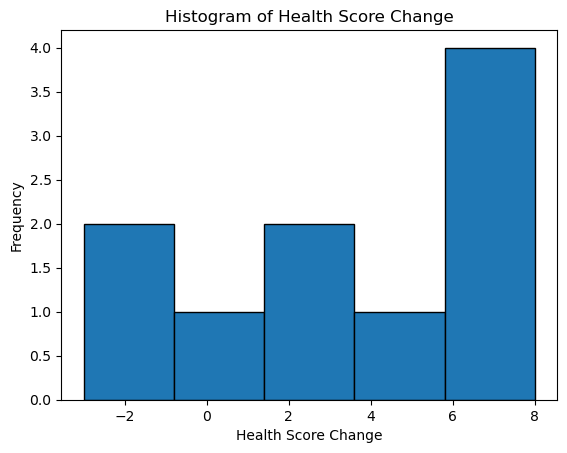

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Your data
df = pd.DataFrame({
    "PatientID": [1,2,3,4,5,6,7,8,9,10], 
    "Age": [45,34,29,52,37,41,33,48,26,39], 
    "Gender": ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    "InitialHealthScore": [84,78,83,81,81,80,79,85,76,83],
    "FinalHealthScore": [86,86,80,86,84,86,86,82,83,84]
})

# Calculate the difference between Final and Initial health scores
df['HealthScoreChange'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Create a histogram
plt.hist(df['HealthScoreChange'], bins=5, edgecolor='black')

# Add labels and title
plt.xlabel('Health Score Change')
plt.ylabel('Frequency')
plt.title('Histogram of Health Score Change')

# Display the plot
plt.show()

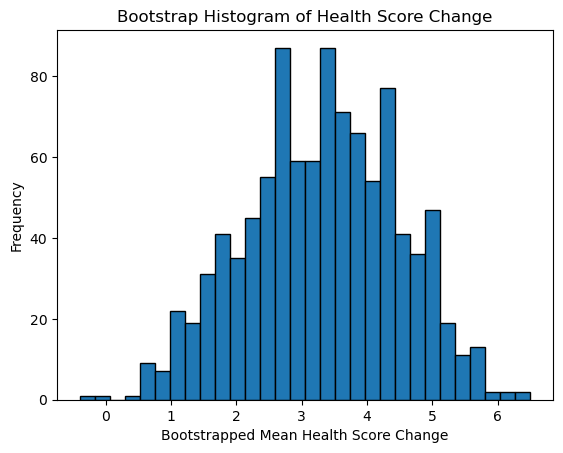

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Your data
df = pd.DataFrame({
    "PatientID": [1,2,3,4,5,6,7,8,9,10], 
    "Age": [45,34,29,52,37,41,33,48,26,39], 
    "Gender": ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    "InitialHealthScore": [84,78,83,81,81,80,79,85,76,83],
    "FinalHealthScore": [86,86,80,86,84,86,86,82,83,84]
})

# Calculate the original health score change
df['HealthScoreChange'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Bootstrap function
def bootstrap_diff(data, n_iterations=1000):
    bootstrapped_diffs = []
    for i in range(n_iterations):
        # Resample the data with replacement
        sample = data.sample(n=len(data), replace=True)
        # Compute the mean difference of this bootstrap sample
        bootstrapped_diffs.append(sample['HealthScoreChange'].mean())
    return np.array(bootstrapped_diffs)

# Perform bootstrapping
n_iterations = 1000
bootstrapped_means = bootstrap_diff(df, n_iterations)

# Create a histogram of the bootstrapped results
plt.hist(bootstrapped_means, bins=30, edgecolor='black')

# Add labels and title
plt.xlabel('Bootstrapped Mean Health Score Change')
plt.ylabel('Frequency')
plt.title('Bootstrap Histogram of Health Score Change')

# Display the plot
plt.show()

95% Confidence Interval: [0.8, 5.5]


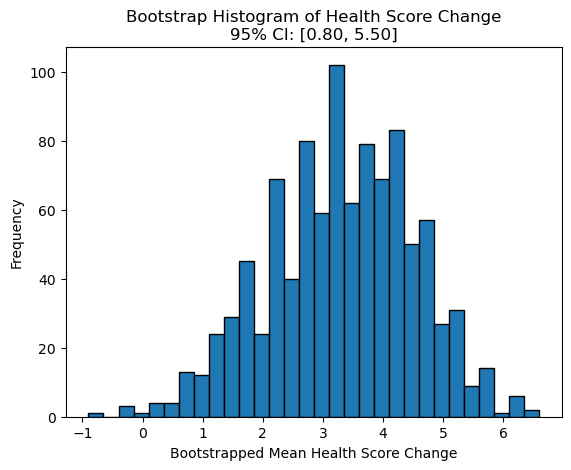

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Your data
df = pd.DataFrame({
    "PatientID": [1,2,3,4,5,6,7,8,9,10], 
    "Age": [45,34,29,52,37,41,33,48,26,39], 
    "Gender": ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    "InitialHealthScore": [84,78,83,81,81,80,79,85,76,83],
    "FinalHealthScore": [86,86,80,86,84,86,86,82,83,84]
})

# Calculate the original health score change
df['HealthScoreChange'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Bootstrap function
def bootstrap_diff(data, n_iterations=1000):
    bootstrapped_diffs = []
    for i in range(n_iterations):
        # Resample the data with replacement
        sample = data.sample(n=len(data), replace=True)
        # Compute the mean difference of this bootstrap sample
        bootstrapped_diffs.append(sample['HealthScoreChange'].mean())
    return np.array(bootstrapped_diffs)

# Perform bootstrapping
n_iterations = 1000
bootstrapped_means = bootstrap_diff(df, n_iterations)

# Calculate the 95% confidence interval (percentile method)
lower_bound = np.percentile(bootstrapped_means, 2.5)
upper_bound = np.percentile(bootstrapped_means, 97.5)

# Print the confidence interval
print(f"95% Confidence Interval: [{lower_bound}, {upper_bound}]")

# Create a histogram of the bootstrapped results
plt.hist(bootstrapped_means, bins=30, edgecolor='black')

# Add labels and title
plt.xlabel('Bootstrapped Mean Health Score Change')
plt.ylabel('Frequency')
plt.title(f'Bootstrap Histogram of Health Score Change\n95% CI: [{lower_bound:.2f}, {upper_bound:.2f}]')

# Display the plot
plt.show()

Since the 95% confidence interval does not fall within the value zero, we can reject the null hypothesis that the vaccine does not effect the patient's health. However, it is important to consider that the sample size of patients was only 10. Although bootstrapping does make our test more reliable, it can only help so much and it is still possible that our results do not accurately reflect the population. There are also many other factors that could have affected the change in health score such as age and sex which were not considered.

ChatGPT: 
"Summary of Bootstrapping and Confidence Interval Analysis
In this exercise, I analyzed health score data for 10 patients to evaluate the impact of a new vaccine. The analysis focused on the difference between the FinalHealthScore and InitialHealthScore for each patient. I used bootstrapping techniques to assess the uncertainty around the mean health score change.

First, I calculated the change in health score for each patient and plotted a histogram to visualize the distribution. Then, I performed a bootstrapping procedure, which involved resampling the data with replacement 1,000 times and computing the mean health score change for each resampled dataset. This provided a distribution of bootstrapped means, which was plotted in another histogram.

Finally, I computed the 95% confidence interval for the mean health score change using the percentile method. The interval was obtained by taking the 2.5th and 97.5th percentiles of the bootstrapped mean differences, which gave a range representing where the true mean is likely to fall with 95% confidence.

This analysis allowed me to estimate the impact of the vaccine on health scores while accounting for the variability in the sample."

9. Yes